In [9]:
import matplotlib.pyplot as plt
from Cpusar import Cpusar
%matplotlib inline


In [2]:
cpusar = Cpusar('C:\\Users\\Inmetrics\\Documents\\NoteBook\\AnaliseSistemaOperacional\\Linux\\CPU_sar.txt')
dados = cpusar.getDataframe()
dados.head()

,Data,Hora,AmPm,CPU,User,Nice,System,Iowait,Steal,Idle,CPU %
DateTime,,,,,,,,,,,
2018-10-24 01:00:01,10/24/2018,01:00:01,AM,all,4.50,0.0,3.23,0.02,0.0,92.24,7.76
2018-10-24 01:00:01,10/24/2018,01:00:01,PM,all,32.44,0.0,22.88,0.01,0.0,44.67,55.33
2018-10-24 01:10:01,10/24/2018,01:10:01,AM,all,3.89,0.0,2.64,0.16,0.0,93.32,6.68
2018-10-24 01:10:01,10/24/2018,01:10:01,PM,all,33.46,0.0,23.97,0.01,0.0,42.56,57.44
2018-10-24 01:20:01,10/24/2018,01:20:01,AM,all,4.83,0.0,2.81,0.03,0.0,92.33,7.67


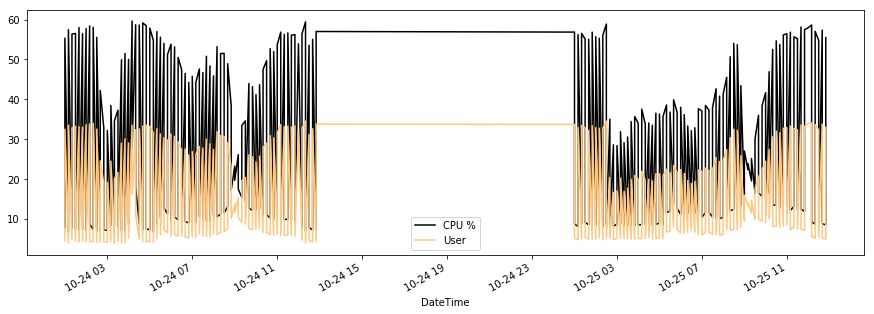

In [8]:
dados[['CPU %', 'User']].plot(colormap='copper',figsize=(15, 5));

In [7]:
print(type(dados['CPU %'] [0]))

<class 'numpy.float64'>


In [ ]:
dia10 = dados[['CPU %', 'User']]
dia10 = dia10.loc[dadosAccesslog.index == 200]
dados[['CPU %', 'User']].plot(colormap='copper',figsize=(15, 5));

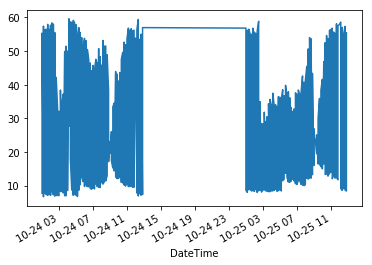

In [11]:
import numpy as np
import pandas as pd
import re
from datetime import datetime

def parsedatetime(x, y, z):
    datahora = x + ' ' + y + ' ' + z
    return datetime.strptime(datahora, '%m/%d/%Y %H:%M:%S %p')

def convToFloat( val):
    result = re.sub('\s+', '' , val)
    return float(result)

def calcConsumoCPU(idle):
    return float(100 - idle)

COLUMNS = ['Data','Hora', 'AmPm', 'CPU','User','Nice','System','Iowait','Steal','Idle']

dfcpu = pd.read_csv('CPUSAR_14122018164952.log',
                   sep='\s+',
                   engine='python', 
                   na_values='-', 
                   header=None,
                   names=COLUMNS,
                   converters={'User': convToFloat,
                              'Nice': convToFloat,
                              'System': convToFloat,
                              'Iowait': convToFloat,
                              'Steal': convToFloat,
                              'Idle': convToFloat}
                   )
dfcpu['DateTime'] = [parsedatetime(x, y, z) for x, y, z in dfcpu[['Data','Hora', 'AmPm']].values]
dfcpu = dfcpu.set_index('DateTime')
dfcpu = dfcpu.sort_values(by='DateTime')
dfcpu['CPU %'] = [calcConsumoCPU(idle) for idle in dfcpu[['Idle']].values]

dfcpu['CPU %'].plot()